<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline
pd.set_option('display.max_columns', None)

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [2]:
data = pd.read_csv("asset_price_data.csv")
df = data.copy()

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [3]:
df.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [4]:
df['date'] = pd.to_datetime(df['date'])

returns_df = df.set_index('date').pct_change() * 100

print(returns_df)

              Asset1    Asset2    Asset3    Asset4    Asset5
date                                                        
2019-01-02       NaN       NaN       NaN       NaN       NaN
2019-01-03 -0.203234 -1.607159 -0.569902 -0.270690 -0.943211
2019-01-04 -0.273984  2.095422  2.525524 -0.112542  1.924221
2019-01-07 -0.151170  1.263162 -0.733753  0.185572  1.479175
2019-01-08 -0.153486  0.100285  0.703977  0.360533 -0.019179
...              ...       ...       ...       ...       ...
2021-12-27 -0.091306  0.738415  0.543901  0.000000  1.344319
2021-12-28  0.006442  0.548309  0.759918  0.000000 -0.114106
2021-12-29 -0.486243 -0.158812 -0.664707  0.017523 -0.314151
2021-12-30 -0.069556  0.290341  0.334577  0.026280  0.143246
2021-12-31  0.082881 -0.532184  0.051302  0.011677  0.000000

[783 rows x 5 columns]


/var/folders/0v/fj9w0wb16hv195v2v8d8qvr80000gn/T/ipykernel_95919/579038976.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_df = df.set_index('date').pct_change() * 100


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

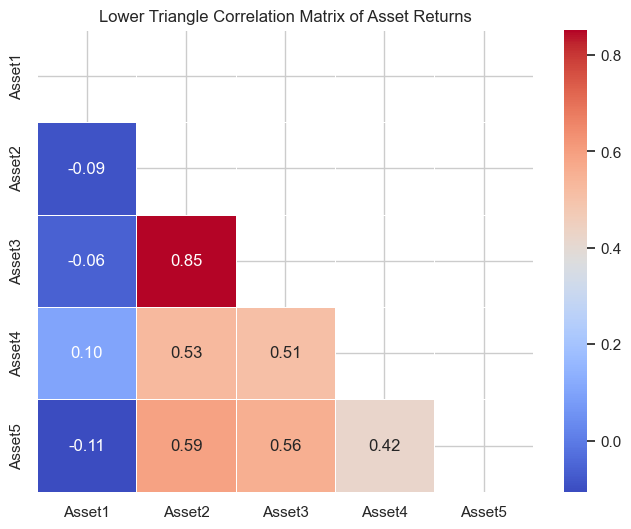

In [5]:
correlation_matrix = returns_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Lower Triangle Correlation Matrix of Asset Returns")
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

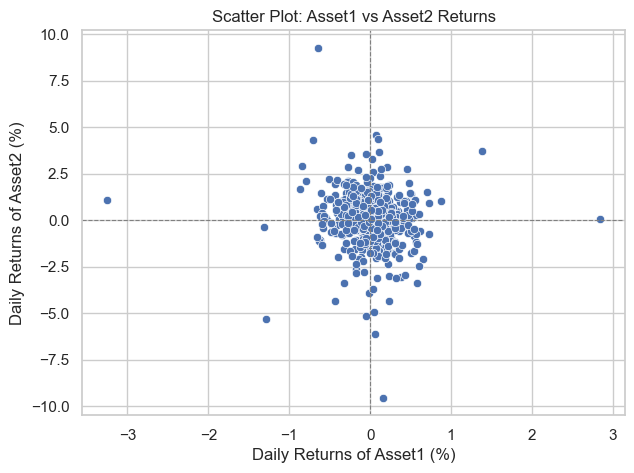

In [6]:
asset_x = 'Asset1'
asset_y = 'Asset2'

plt.figure(figsize=(7, 5))
sns.scatterplot(x=returns_df[asset_x], y=returns_df[asset_y])
plt.xlabel(f"Daily Returns of {asset_x} (%)")
plt.ylabel(f"Daily Returns of {asset_y} (%)")
plt.title(f"Scatter Plot: {asset_x} vs {asset_y} Returns")
plt.axhline(0, color='gray', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='dashed', linewidth=0.8)
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [7]:
df2 = pd.read_csv("portfolio_weights.csv")

In [8]:
df2.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<Figure size 800x600 with 0 Axes>

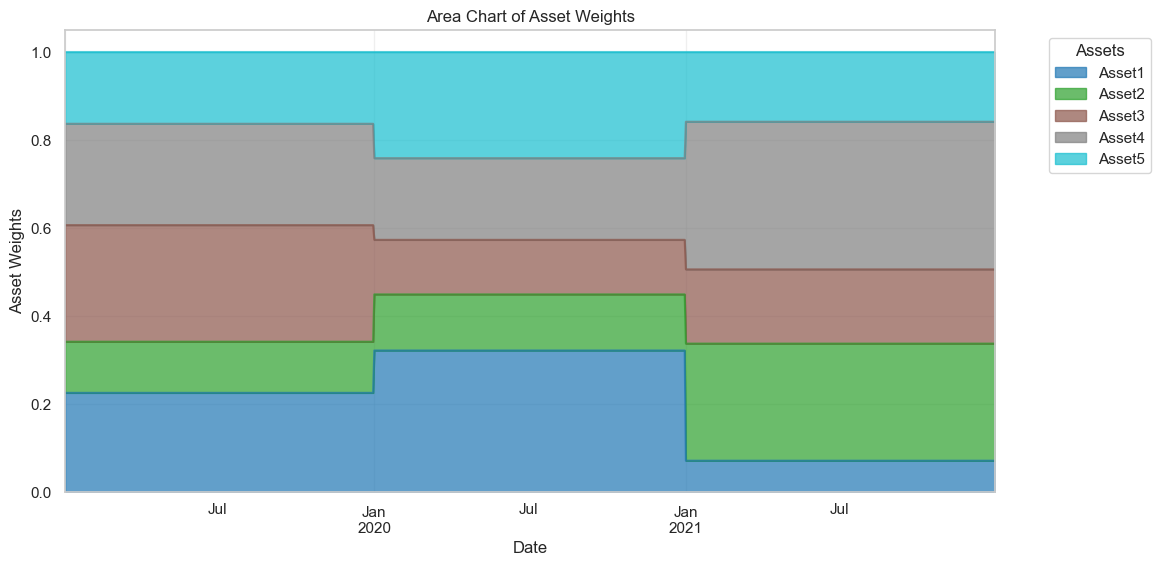

In [9]:
df2['date'] = pd.to_datetime(df2['date'])

df2.set_index('date', inplace=True)

plt.figure(figsize=(8, 6))
df2.plot(kind='area', stacked=True, alpha=0.7, colormap='tab10')

plt.title("Area Chart of Asset Weights")
plt.xlabel("Date")
plt.ylabel("Asset Weights")
plt.legend(title="Assets", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

plt.show()

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

/var/folders/0v/fj9w0wb16hv195v2v8d8qvr80000gn/T/ipykernel_95919/3050342644.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_df_2 = df2.pct_change()


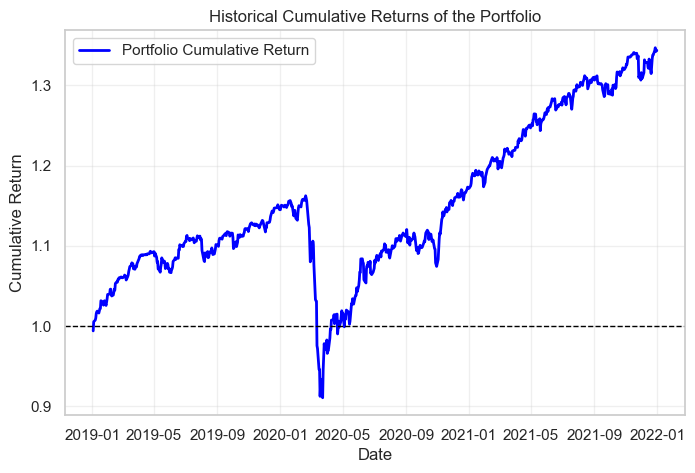

In [10]:
weights = [0.225458, 0.116255, 0.265003, 0.23031, 0.164974]  

df2 = pd.DataFrame(data)

df2['date'] = pd.to_datetime(df2['date'])

df2.set_index('date', inplace=True)

returns_df_2 = df2.pct_change()

portfolio_returns = returns_df_2.dot(weights)  

cumulative_returns = (1 + portfolio_returns).cumprod()  


plt.figure(figsize=(8, 5))
plt.plot(cumulative_returns, label="Portfolio Cumulative Return", color="blue", linewidth=2)

# Customize Chart
plt.title("Historical Cumulative Returns of the Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.axhline(1, color='black', linestyle='dashed', linewidth=1)  # Baseline at 100%
plt.grid(alpha=0.3)
plt.legend()
plt.show()

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [17]:
df2 = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

annualized_returns = {}

annualization_factor = 261

for asset in df.columns:
    beginning_value = df[asset].iloc[0]  
    ending_value = df[asset].iloc[-1]    
    num_days = len(df[asset])             
    cumulative_return = (ending_value / beginning_value) - 1
    annualized_return = (1 + cumulative_return) ** (annualization_factor / num_days) - 1
    annualized_returns[asset] = round(annualized_return, 4)

print("Annualized Returns:")
for asset, return_value in annualized_returns.items():
    print(f"{asset}: {return_value}")

Annualized Returns:
Asset1: 0.0242
Asset2: 0.2305
Asset3: 0.15
Asset4: 0.0419
Asset5: nan


<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [12]:
daily_volatility = returns_df_2.std()

annualization_factor = 261

annualized_volatility = daily_volatility * np.sqrt(annualization_factor)

print(annualized_volatility)

Asset1    0.048304
Asset2    0.193938
Asset3    0.188591
Asset4    0.053642
Asset5    0.152430
dtype: float64


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<Figure size 1000x600 with 0 Axes>

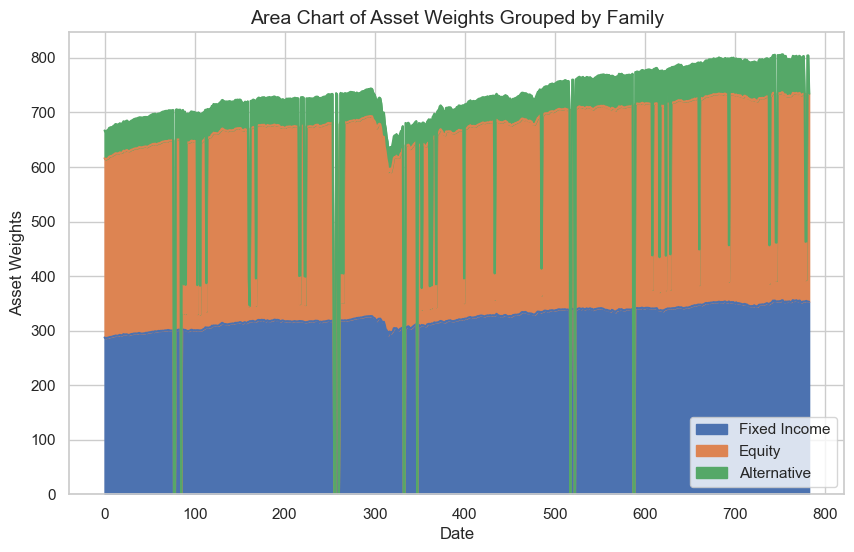

In [15]:
fixed_income = df2[['Asset1', 'Asset2']].sum(axis=1)
equity = df2[['Asset3', 'Asset4']].sum(axis=1)
alternative = df2[['Asset5']].sum(axis=1)

family_weights = pd.DataFrame({
    'Fixed Income': fixed_income,
    'Equity': equity,
    'Alternative': alternative
})

plt.figure(figsize=(10, 6))

family_weights.plot(kind='area', stacked=True, figsize=(10, 6))

plt.title('Area Chart of Asset Weights Grouped by Family', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Asset Weights', fontsize=12)

plt.show()